In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


With an attempt to explain the cause of heart attacks, this notebook explores the major parameters that increases the chances of a heart attack in a human being. Also, the notebook defines a module to detect the chances of a person having a heart attack.
This notebook dwells on these basic questions:
1. Is age and gender really a determining factor for heart diseaes?
2. What are the bodily factors that causes heart diseases.
3. Can we predict the chances of a heart disease in a person? If so, how reliable would it be?

In [13]:
#Importing the data

data = pd.read_csv('../input/heart.csv')

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [14]:
# getting the columns in the dataset

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
#exploring the data statistically

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


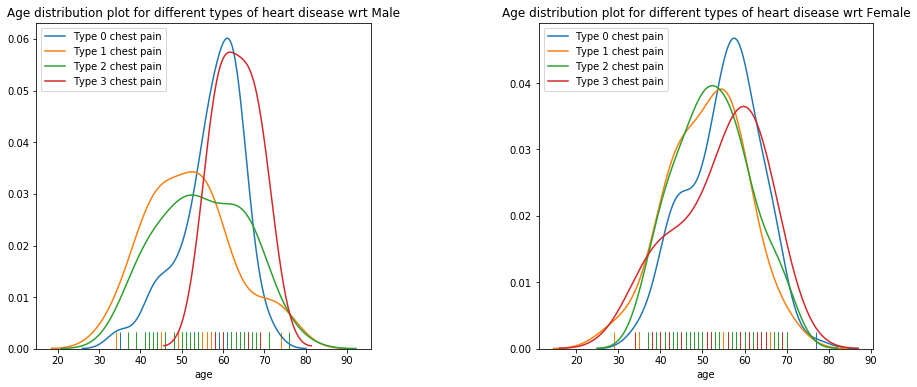

In [16]:
# Understanding the influence of Age on heart diseases, coupled with gender

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (15,6))
n = 0
for gender in [0,1]:
    n = n + 1
    plt.subplot(1,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for c in range(0,4):
        sns.distplot(data['age'][data['cp'] == c][data['sex'] == gender], 
                     hist = False, rug = True, label = 'Type {} chest pain'.format(c))
    plt.title('Age distribution plot for different types of heart disease wrt {}'.
              format('Male' if gender == 0 else 'Female'))
plt.legend()
plt.show()                    

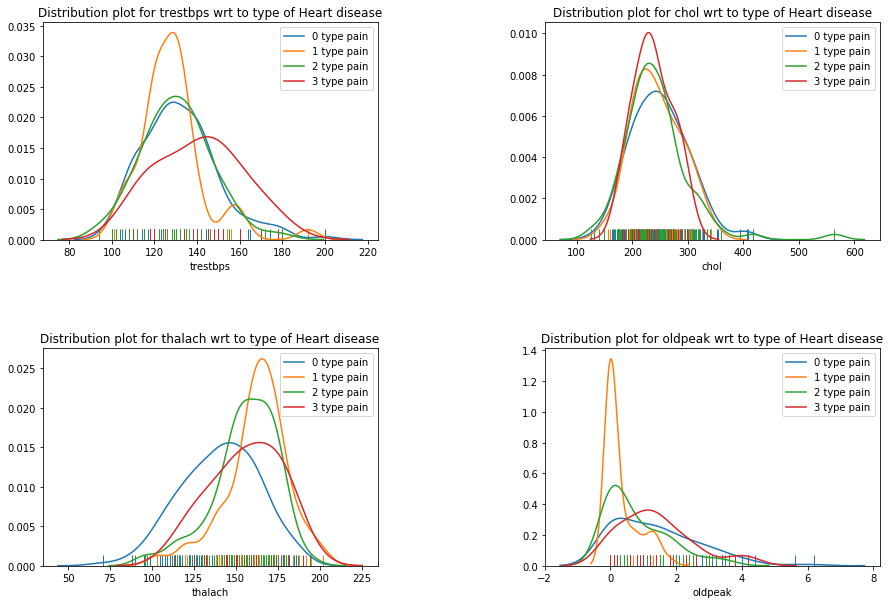

In [17]:
# Visualizing the distribution of parameter values wrt presence of heart disease

param = ['trestbps', 'chol', 'thalach','oldpeak']

plt.figure (1, figsize = (15,10))
n = 0
for p in param:
    n = n + 1
    plt.subplot(2,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for ctype in range(0,4):
            sns.distplot(data[p][data['cp'] == ctype], 
                     hist = False, rug = True, label = "{} type pain".format(ctype))
    plt.title("Distribution plot for {} wrt to type of Heart disease".format(p))
plt.legend()
plt.show() 

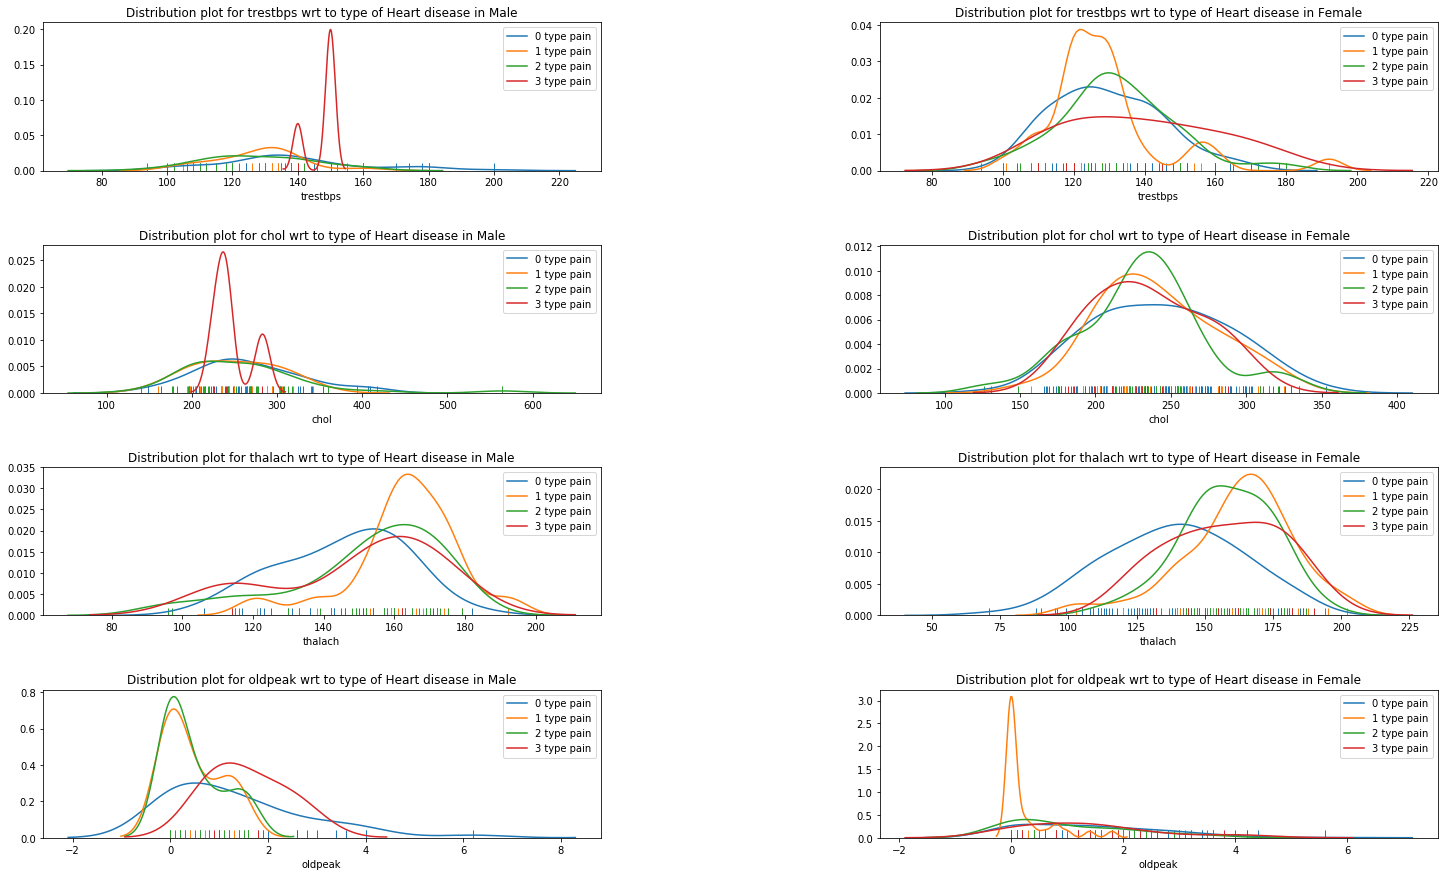

In [18]:
# Determining the influence of gender on heart diseases using the same parameters

param = ['trestbps', 'chol', 'thalach','oldpeak'] 

plt.figure (1, figsize = (25,15))
n = 0
for p in param:
    for gender in [0, 1]:
        n = n + 1
        plt.subplot(4,2, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        for ctype in range(0,4):
            sns.distplot(data[p][data['cp'] == ctype][data['sex'] == gender], 
                     hist = False, rug = True, label = "{} type pain".format(ctype))
        plt.title("Distribution plot for {} wrt to type of Heart disease in {}".
                  format(p, 'Male' if gender == 0 else 'Female'))
plt.legend()
plt.show()

From the above visualizations, the following basic inferences can be drawn:
1. Chest pain can be caused by all of the 4 parameters mentioned above, having more or less influence of the type of chest pains
2. A visibly large proportion of **Men** having **trestbps** value between 140-160 and **chol** value between 200-300 suffers from type-3 chest pain. Similarly, a visibly large proportion of **Women** having **oldpeak** value less than 1 experiences from type-1 chest pain.
3. The distributions graphs show vastly different reasult for male and female, meaning that **GENDER** have a profound impact on the cause of heart diseases. Also, the **chances and the types of chest pains** experienced by patients also differ vastly across the two genders.
4. Age also plays an important role in determining the *type* of disease.
5. A large propotion of **Men** of age 40-60 suffers mostly from type-3 heart disease, but, a similart proportion of men of the same age group have no heart disases at all. 
6. **Women** mostly don't suffer from any heart diseaes, however, some experience type-2 and type-1 heart diseases at the age of 40-60. Also, type-3 heart diseases are experienced by females in some proportions after the age of 60.
7. Any discussion about heart diseases and it's causes, without considering **gender** as a factor is erroneous. 

In [22]:
#checking the influence of categorical variables on the heart diseases, wrt gender.

param = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'target']
